In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import itertools, operator, random, math
from scipy.sparse.linalg import spsolve_triangular
from sklearn import linear_model
import utils as ut
%matplotlib inline

In [2]:
def abr(t, pop):
    la, lb, lr, ra, rb, rr = pop
    ka, da, dab = 400, 2, 400
    kb, kbb, db, dba = 2, 30, 2.8, 30
    kr, krb, dr = 0.1, 1.5, 0.2

    dladt = ka*(1-la-ra)*lr - da*la - dab*la*lb**2
    dlbdt = (1-lb-rb)*(kb + kbb*lb) - db*lb - dba*la*lb**2
    dlrdt = (1-lr-rr)*(kr+krb*lb) - dr*lr
    dradt = ka*(1-la-ra)*rr - da*ra - dab*ra*rb**2
    drbdt = (1-lb-rb)*(kb + kbb*rb) - db*rb - dba*ra*rb**2
    drrdt = (1-lr-rr)*(kr+krb*rb) - dr*rr
    dpop = np.array([dladt, dlbdt, dlrdt, dradt, drbdt, drrdt])
    return dpop

In [6]:
dt, pts = 0.1, int(60/0.1)
tspan = np.linspace(dt, 60, num=pts)
pop0 = [1, 0, 0, 0, 1, 1]
sol = integrate.solve_ivp(abr, [tspan[0], tspan[-1]], pop0, method='RK45', rtol=1e-10, atol=1e-10,t_eval=tspan)
dpop = abr(sol.t, sol.y)

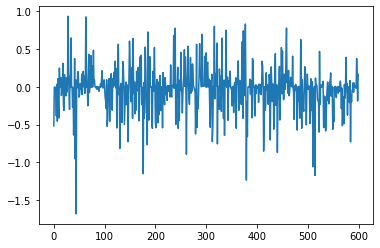

In [19]:
est_mat2 = ut.funkSVD(np.array(sample_pop), 6, 0.005, 1000)
plt.plot(est_mat2[0] - est_mat[0])

(6, 600)


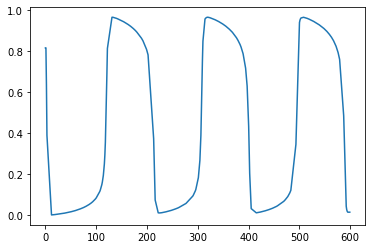

In [46]:
from scipy.interpolate import interp1d
interp_pop = np.full_like(sol.y, fill_value=0)
print(interp_pop.shape)
for i, sample_dx in enumerate(sample_pop):
    t_idx = np.argwhere(~np.isnan(sample_dx)).T[0]
    sampled_t = sol.t[t_idx]
    sampled_data = sample_dx[t_idx]
    y_interp = np.interp(tspan, sampled_t, sampled_data)
    interp_pop[i] = np.reshape(y_interp, (1,600))


# interpolation
# from scipy.interpolate import interp1d
# interp_pop = []
# for i in range(sample_pop.shape[0]):
#     t_idx = np.argwhere(~np.isnan(sample_pop[i])).T[0]
#     sampled_t = sol.t[t_idx]
#     sampled_data = sample_pop[i][t_idx]
#     y_interp = np.interp(tspan,sampled_t,sampled_data)
#     interp_pop.append(y_interp)

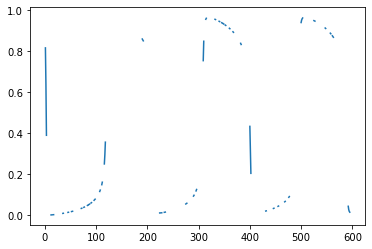

In [111]:
plt.plot(sample_pop[0])

In [40]:
print(sample_pop.shape)

(6, 600)


In [11]:
sample_pop = ut.random_sampling(sol.y, 0.3)
est_mat = ut.funkSVD(np.array(sample_pop), 10, 0.005, 1000)

In [16]:
ft_pop = ut.ft_data(est_mat, tspan, dt)
ft_est_mat = ut.funkSVD_ft(ft_pop, sample_pop, 6, 0.005, 2000)

In [ ]:
y_interp = np.interp(tspan, sampled_t, sampled_data)

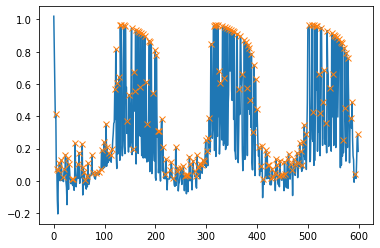

In [72]:
from scipy.signal import find_peaks, peak_prominences
peaks, _ = find_peaks(ft_est_mat[0], height=(0, 1), rel_height = 0.5)
plt.plot(ft_est_mat[0])
plt.plot(0, "--", color="gray")
plt.plot(1, ":", color="gray")
plt.plot(peaks, ft_est_mat[0][peaks], "x")
plt.show()

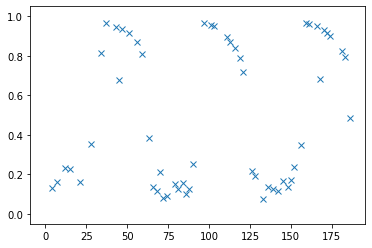

In [110]:
peaks, _ = find_peaks(ft_est_mat[0], height=(0, 1))
# plt.plot(ft_est_mat[0])
plt.plot(0, "--", color="gray")
plt.plot(1, ":", color="gray")
new_peak = ft_est_mat[0][peaks]
peaks, _ = find_peaks(new_peak, height=(0, 1))
plt.plot(peaks, new_peak[peaks], "x")
# xplt.plot(peaks, ft_est_mat[0][peaks], "x")
plt.show()

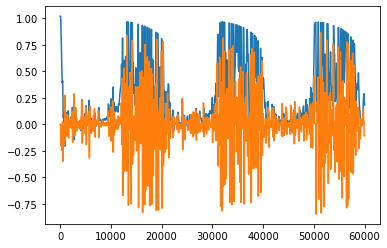

In [115]:
y_interp = np.interp(np.linspace(0.001, 60, 60000), tspan, ft_est_mat[0])
plt.plot(y_interp)
plt.plot((y_interp[1:] - y_interp[:-1])/0.01)

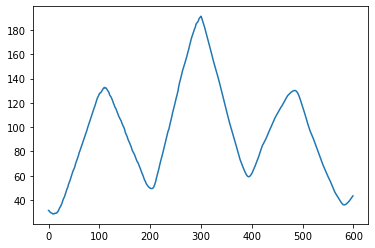

In [80]:
from scipy import signal
corr = signal.correlate(interp_pop[0], est_mat[0], mode='same')
plt.plot(corr)

[0.01546629 0.01546629] [ 1.         -0.96906742]
[0.01546629 0.01546629] [ 1.         -0.96906742]


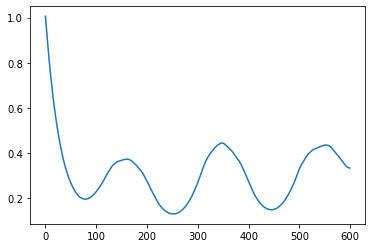

In [93]:
b, a = signal.butter(1, 0.0)
print(b, a)
zi = signal.lfilter_zi(b, a)
z, _ = signal.lfilter(b, a, ft_est_mat[0], zi=zi*ft_est_mat[0][0])
z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
print(b, a)
y = signal.filtfilt(b, a, ft_est_mat[0])
plt.plot(y)

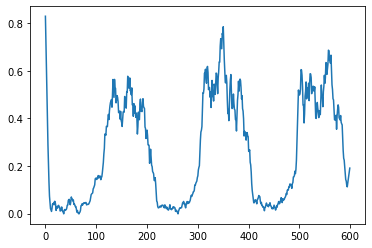

In [88]:
from scipy.signal import savgol_filter

smoothed_1dg = savgol_filter(ft_est_mat, window_length = 11, polyorder = 1)
plt.plot(smoothed_1dg[0])

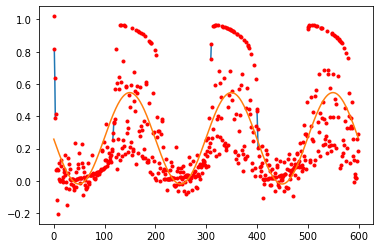

In [29]:
plt.plot(sample_pop[0])
plt.plot(ft_est_mat[0],'r.')
# plt.plot(ft_est_mat[0][1:] - ft_est_mat[0][:-1])

ft_pop = ut.ft_data(ft_est_mat, tspan, dt)

In [98]:
u, s,v = np.linalg.svd(ft_est_mat, full_matrices=False)

In [100]:
u.shape, v.shape

((6, 6), (6, 600))

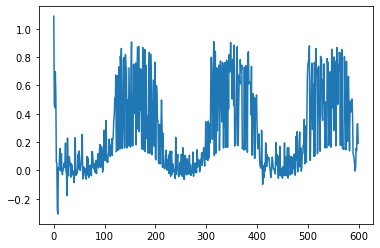

In [103]:
plt.plot(u[:,:3].dot(np.diag(s[:3])).dot(v[:3,:])[0])

In [ ]:
dpop_diff = ut.time_different(dt, dpop, ft_est_mat)

In [65]:
# random sampling
sample_pop = ut.random_sampling(sol.y, 0.03)
# filling unknown values
est_mat = ut.funkSVD(np.array(sample_pop), 10, 0.005, 1000)
# fourier transform
ft_pop = ut.ft_data(est_mat, tspan, dt)
# filling unknown values again
ft_est_mat = ut.funkSVD_ft(ft_pop, sample_pop, 10, 0.005, 1000)
# calculate time derivative
dpop_diff = ut.time_different(dt, dpop, ft_est_mat)
# generate libraray
theta, descr = ut.lib_terms(ft_est_mat,3,['la', 'lb', 'lr', 'ra', 'rb','rr'])
Xi_std = ut.sparsifyDynamics(theta, abr(sol.t, ft_est_mat).T, 0.01)

TypeError: funkSVD_ft() missing 1 required positional argument: 'ft_pop'

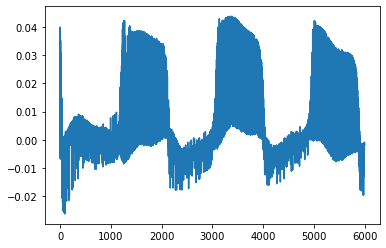

In [56]:
ft_u, ft_s, ft_v = np.linalg.svd(ft_est_mat, full_matrices=False)
dpop_diff = ut.time_different(dt, dpop, ft_u.dot(ft_v))
dpop_diff2 = ut.time_different(dt, dpop,ft_est_mat)
plt.plot(ft_u.dot(ft_v)[0])

In [62]:
clf = linear_model.Lasso(alpha=0, fit_intercept=False)
clf.fit(theta,dpop_diff2.T)
Xi = clf.coef_

In [349]:
ft_est_mat = ut.funkSVD_ft(ft_pop, sample_pop, 6, 0.005, 4000, ft_pop)
theta, descr = ut.lib_terms(ft_est_mat,3,['la', 'lb', 'lr', 'ra', 'rb','rr'])
Xi_std = ut.sparsifyDynamics(theta, abr(sol.t, ft_est_mat).T, 0.001)
dpop_diff = ut.time_different(dt, dpop, pop_svd)

KeyboardInterrupt: 

In [357]:
ft_est_mat.shape

(6, 6000)

In [358]:
dpop_est = abr(sol.t, ft_est_mat)

In [354]:
dpop_diff = ut.time_different(dt, dpop, ft_est_mat)

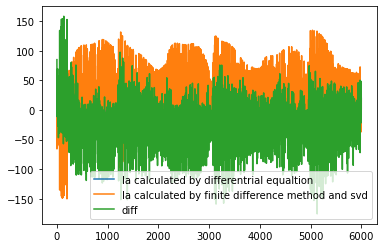

In [360]:
plt.plot(dpop_diff[0], label='la calculated by differentrial equaltion')
plt.plot(dpop_est[0], label= 'la calculated by finite difference method and svd')
plt.plot(dpop_diff[0] - dpop_est[0], label='diff')
plt.legend()

In [367]:
# linear regression applied
clf = linear_model.Lasso(alpha=0, fit_intercept=False)
clf.fit(theta,dpop_diff.T)
Xi = clf.coef_
# clf2 = linear_model.Lasso(alpha=0, fit_intercept=False)
# clf2.fit(theta,dpop_est.T)
# Xi_std = clf2.coef_

ValueError: Complex data not supported
[[-6.52266326e+01+7.60120203e-14j -5.79409067e+00+7.93913714e-15j
  -3.74924475e-01+8.14212252e-18j -1.02554105e+02+1.58687309e-13j
  -7.10828694e+00+9.38145750e-15j -5.33090295e-01+2.37235880e-17j]
 [ 2.19661765e+01-1.61873258e-14j -5.30956795e-01-1.33433339e-15j
   7.21159383e-03+1.51055490e-16j  4.00813531e+01+8.07086555e-16j
  -4.50131540e+00-3.57203217e-15j  3.52941131e-01+5.01143338e-16j]
 [-9.09238528e-01+1.03139311e-14j  8.66296494e-02+6.64297329e-22j
  -7.83320007e-02-4.27746564e-17j -5.45382602e+01+6.28538090e-14j
  -5.61008111e+00+1.88704406e-15j -5.93517389e-01-2.17499684e-16j]
 ...
 [-2.40018220e+00+7.31944363e-14j  2.84706927e+00-3.06654505e-15j
   1.59670152e-01-3.53373667e-16j  3.00560171e+01+1.05695380e-13j
   3.71941642e+00+7.08600677e-16j  1.93156310e-01-1.94225247e-16j]
 [-3.67749878e+01-7.14064555e-15j  3.86473722e-01+5.89350187e-15j
   5.17651105e-02-3.24174025e-17j -4.13182489e+01+3.30680607e-15j
  -2.74142232e-01+3.50027231e-15j -6.15645866e-02-2.07074500e-17j]
 [ 1.77419406e+01+1.69032755e-14j  2.88434403e+00-1.73566556e-15j
   1.06633981e-01+3.42880515e-17j  6.95382585e+01+4.74368685e-14j
   2.94097023e+00-2.05378617e-15j  4.68429419e-02+3.55076957e-17j]]


In [366]:
dpop_diff.shape

(6, 6000)

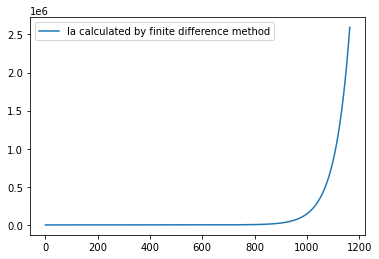

In [368]:
# sol_std = integrate.solve_ivp(sparseGalerkin, [tspan[0], tspan[-1]], pop0, rtol=1e-10, atol=1e-10, method='RK45',args=(Xi_std,3))
sol_res = integrate.solve_ivp(sparseGalerkin, [tspan[0], tspan[-1]], pop0, rtol=1e-10, atol=1e-10, method='RK45',args=(Xi.T,3))
# plt.plot(sol_std.y[0], label='la calculated by differentrial equaltion')
plt.plot(sol_res.y[0],label ='la calculated by finite difference method')
plt.legend()

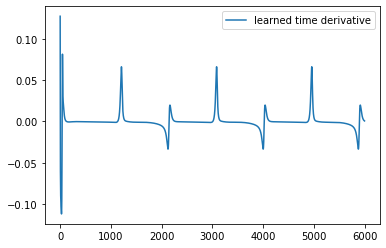

In [316]:
plt.plot(theta.dot(Xi.T)[:,0], label="learned time derivative")
plt.plot(dpop_svd[0], label="Ture time derivative")
plt.legend()

In [319]:
import pandas as np
def visual_param(Xi, descr):
    small_idx = abs(Xi) < 1e-4
    Xi[small_idx] = 0
    new_set =  [x.replace('(', '').replace(']', '') for x in descr] 
    name_s = ['la', 'lb', 'lr', 'ra', 'rb', 'rr']
    label = []
    for str_ in new_set[2:]:
        idx_ = [int(x) for x in str_.split(') [')[0].split(',')]
        lab = ""
        for idx, i in enumerate(idx_):
            j = i
            while j > 0:
                lab += name_s[idx]
                j -= 1
        label.append(lab)

    term_label = ['1'] + label

    df_term = pd.DataFrame(Xi.T, index=term_label, columns=name_s)

    return df_term
df_term = visual_param(Xi, descr)

In [320]:
df_term.sort_values(by=['la'])['la'][:5], df_term.sort_values(by=['la'])['la'][-5:]

(lrlrrr   -1022.097407
 lblrra    -811.312219
 lblrrb    -711.777899
 larbrr    -363.797673
 lrrarb    -333.435337
 Name: la, dtype: float64,
 lalrrb     496.183881
 larrrr     506.130059
 lalblr     633.622499
 lalrra     735.906877
 lblrlr    1651.265583
 Name: la, dtype: float64)

In [251]:
co1, co2, co3, co4, co5, co6 = [1, -1, 0, -1, 1, 0], [1, -1, 1, -1, 0], [1, 1, 0, -1], [1, -1, 0], [1, 0], [1]
corr_matrix = np.empty((6,6))
corr_matrix[0], corr_matrix[-1] = co1, co1
corr_matrix[1][1:], corr_matrix[-2][:-1] =  co2, co2
corr_matrix[2][2:], corr_matrix[-3][:-2] =  co3, co3
corr_matrix[3][3:], corr_matrix[-4][:-3] =  co4, co4
corr_matrix[4][4:], corr_matrix[-5][:-4] =  co5, co5
corr_matrix[5][5:], corr_matrix[-6][:-5] =  co6, co6

In [240]:
Xi_new = Xi.T.dot(corr_matrix)

(6, 84)

In [242]:
df_term_new = visual_param(Xi_new.T, descr)

In [243]:
df_term[abs(df_term['la'])>0]['la']

rr       -0.003234
rrrr     -0.022342
rbrb     -0.150189
lala      0.097713
rararr    0.047347
lblbra   -0.044824
lararr   -0.025271
Name: la, dtype: float64

In [246]:
dpop_diff.T.dot(corr_matrix)

array([[-4.19299994e+00, -6.17083955e-01, -3.47287761e+00,
         7.59851556e-01, -4.95285108e+00, -2.19649562e+00],
       [-3.40226633e+00, -1.44930308e-01, -2.82493016e+00,
         1.00245553e+00, -4.40462251e+00, -1.79950108e+00],
       [-2.86488239e+00,  1.40131216e-01, -2.36526272e+00,
         1.11611465e+00, -3.98079808e+00, -1.52925043e+00],
       ...,
       [ 9.69669921e-03,  3.41222712e-03, -5.71196201e-03,
         1.13564706e-01, -6.02090258e-02, -7.97214160e-02],
       [ 1.22667759e-02,  4.24852402e-03, -3.99351225e-03,
         1.13238320e-01, -5.74148505e-02, -7.82767452e-02],
       [ 9.30255010e-03,  2.68955161e-03, -5.05673721e-03,
         1.10484624e-01, -5.77278150e-02, -7.95984400e-02]])

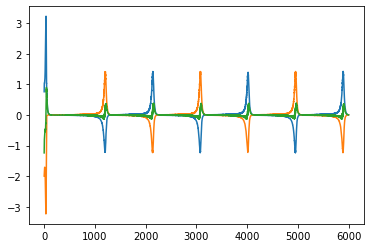

In [261]:
# plt.plot(dpop_diff[0])
# plt.plot(dpop_diff.T.dot(corr_matrix)[:,0])
plt.plot(dpop_diff[3])
plt.plot(dpop_diff[0])
plt.plot(dpop_diff[3] + dpop_diff[0])


0.00533696685406903

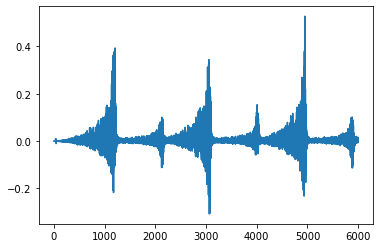

In [289]:
plt.plot(dpop_diff[0] - dpop[0])
np.mean(dpop_diff[0] - dpop[0])

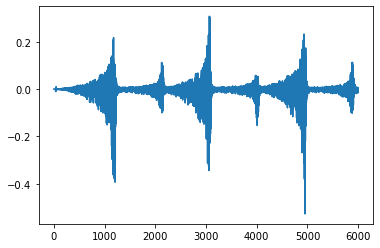

In [299]:
# plt.plot(dpop[3] + dpop[0])
# plt.plot(dpop_diff[3] + dpop_diff[0])
# plt.plot(x_new[3] + x_new[0])
# plt.plot(dpop[3] + dpop[0] - x_new[3] - x_new[0])
plt.plot(dpop[0] - dpop_diff[0])
# plt.plot(dpop[3] + dpop[0] - x_new[3] - x_new[0])
# plt.plot(dpop[3] + dpop[0] - x_new[3] - x_new[0])

In [290]:
x_new = dpop_diff + np.random.uniform(low=-0.005, high =0.005, size=dpop_diff.shape)